In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("EastWestAirlines.csv")

In [3]:
df.shape

(3999, 12)

In [4]:
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
def norm_func(i):
    x=(i-i.min()/i.std())
    return (x)
df_norm=norm_func(df.iloc[:,1:])

In [6]:
#Elbow Curve
k = list(range(2,15))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

([<matplotlib.axis.XTick at 0x186e3adf488>,
 <a list of 13 Text major ticklabel objects>)

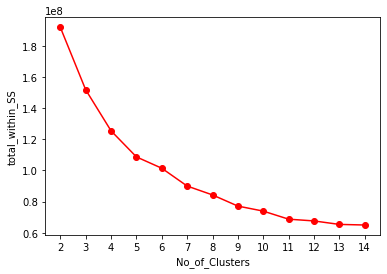

In [7]:
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [8]:
#Taking 5 clusters#########
model=KMeans(n_clusters=5)
model.fit(df_norm)

model.labels_
clusters=pd.Series(model.labels_)
df["Clusters"]=clusters

final_df=df.iloc[:,[0,12,1,2,3,4,5,6,7,8,9,10,11]]

In [9]:
final_df.iloc[:,1:].groupby(df.Clusters).mean()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,0,26254.758690,99.622853,1.558530,1.016780,1.004395,8683.824211,8.738714,258.021574,0.800639,3735.336796,0.316021
1,1,419966.511364,449.965909,3.261364,1.034091,1.000000,49823.329545,19.954545,1598.375000,5.034091,5945.193182,0.715909
2,2,208322.871345,308.014620,3.014620,1.005848,1.014620,35545.608187,18.286550,1053.485380,2.944444,5041.675439,0.494152
3,3,98272.669532,163.600764,2.823305,1.010506,1.028653,27864.592168,15.392550,632.705826,1.833811,4533.846227,0.421203
4,4,922162.526316,564.736842,3.210526,1.000000,1.157895,58492.052632,20.894737,1607.526316,6.263158,6642.315789,0.894737


In [10]:
final_df.to_csv("airlines_knn_cluster.csv")